<table border="0">
    <tr>
        <td>
        <img src="./images/FITSlogo.gif" width="300px">
        </td>
        <td>
        <img src="./images/HDFlogo.png" width="300px">
        </td>  
        <td>
        <img src="./images/netcdf.png" width="300px">
        </td>           
    </tr>
</table>
<hr>

In [1]:
import h5py
import netCDF4
from astropy.io import fits
from astropy.utils.data import download_file
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from versioned_hdf5 import VersionedHDF5File
import cv2, wget
import time
import pandas as pd
import glob

In [2]:
for file in glob.glob("*.h5"):
    os.remove(file)
for file in glob.glob("*.hdf5"):
    os.remove(file)
for file in glob.glob("*.fits"):
    os.remove(file)    

# Comparison between FITS vs HDF vs NetCDF
<hr>

## Summary
1. [Criteria for choosing a format](#choose_format)
2. [User community / Sociability](#community)
3. [Documentation](#documentation)
4. [Freedom of use](#freedom)
5. [Independence / autonomy](#autonomy)
6. [Robustness](#robustness)
7. [Compactness](#compactness)
8. [Availability tools for processing tools](#availability)
9. [Content additional embedded](#content)
10. [Simplicity](#simplicity)
11. [Stability](#stability)
12. [Openness](#openness)
13. [Expressivity](#expressivity)
14. [Mastery](#mastery)
15. [Processing](#processing)
16. [Conclusion](#conclusion)


# 1 - Criteria for choosing a format
<a id="choose_format"/>

- **User community / Sociability** : Is the format widely used in its target community ? By conservation institutions ? The use of a format within its community is an indication of its suitability for the specific needs of that community. A format that is also used beyond curatorial institutions provides additional assurance, as the means of these institutions to maintain a format are limited compared to those of the cultural industries. This criterion is related to the availability of tools: the larger the user community, the more likely it is that it has developed or has had tools developed.
- **Documentation** : Are the format specifications published? If so, are they maintained by a recognized standards body ? What is the their cost ? If the specifications of the format are freely available, it is possible accessible, it is possible for anyone to understand the structure and, if the format is also free, to develop tools that support it.
- **Freedom of use** : Are there any legal barriers for the use of the format ? If a format can be totally open (documented and usable by anyone), it can also be and usable by anyone), it also happens that limitations on the use of documented formats documented formats, in particular because of patents granting industrial property rights registered for the benefit of a for the benefit of a given organization. These patents may limit or prohibit the development of of tools that support the format.
- **Independence / autonomy** : Does the use of the format requires other formats, encodings, software or hardware environment ? The consultation and the use of a digital file are systematically dependent on a technical environment. In addition to the dependence on a software environment which can be proprietary, discussed in the criterion "Freedom of use", the use of certain formats is dependent on hardware environments, software libraries, or elements libraries, or elements that are not usually embedded in the file (for example, the dependence of most dependency of most PDFs on the fonts installed on the user's computer).
- **Robustness** : Does the format have mechanisms to detect, ignore, or even correct corrupted portions of the signal? This criterion evaluates the resistance of files in this format to corruption. Corruption can be caused by media degradation or playback equipment error, but even more often it is caused by transfer interruption, such as network or connection failure. As a result, file formats to be exchanged over the network via streaming are often designed to be robust. Robustness includes the concepts of resilience and error resistance. It depends on the structure of the format. It can be reinforced by the presence of digital fingerprints characterizing each zone of a file, which allows a validation tool to identify precisely the corrupted zone.
- **Compactness** : Does the format express a significant amount of information in a constrained space ? If this compactness is linked to a method of compression method, is it reversible (without loss of information) or not ? One of the major risks to the sustainability of data is the is the budgetary risk. If the budgets that the user can allocate to the purchase of storage space, the are limited, the criterion of compactness can become decisive. Compactness can be linked to the data encoding structure or, if applicable, to the structure of the data or, if applicable, the method of compression. Lossless compression, also known as "reversible lossless compression, also known as "reversible" compression, generally allows a significant reduction in file size, while ensuring that the guaranteeing the possibility, thanks to the same method to decompress the file and obtain a bit-accurate copy of the exact copy of the source file, down to the bit.
- **Availability tools for processing tools** : Are there any tools for restitution, validation, analysis, migration ? Is the organization responsible for format maintenance officially develop any?
- **Content additional embedded** : Does the format allow to embed additional flows necessary for the use, identification and management of the file (metadata, documentation, associated visuals, etc.) ?
- **Simplicity** : Does the format have a simple or complex structure ? Maintaining skills and tools in a complex format will necessarily require a higher investment than investment than on a simple format
- **Stability / evolutivity** : Is the format undergoing a sustained evolution and versions that follow one another with succeed one another at a high frequency? 
- **Openness** : Is the format easily readable and understandable or is structure opaque? In the absence of specific tools, a relatively transparent format can be more easily interpreted and understood by a human interpreted and understood by a human using generic tools generic tools such as text, XML or hexadecimal editors. hexadecimal editors.
- **Expressivity** : Does the format allow to encode all the information that the PDC wishes to express ?
- **Mastery** : Does the user already have the skills and tools necessary for an accurate exploitation the format ? Because the PDC is entrusting their data to ESA, it is important that the format be controlled by both parties.
- **Processing** : how fast to extract data and manipulate data from the file format ?



# 2 - User community / Sociability
<a id="community"/>

## 2.1 - FITS

FITS is used traditionally in most of astronomical projects

## 2.2 - HDF5

<img src="images/HDFcontrib.png">

Gravitational wavelengths and radio astronomy actively use HDF5. NetCDF is used in Plasma Physics.

## 2.3 - Conclusion

FITS is used by a wider astronomy community.

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| User community / Sociability | +++ | + | + |  |


# 3 - Documentation
<a id="documentation"/>

## 3.1 - FITS & HDF5/NetCDF

<img src="images/fits_netcdf_hdf5_ogc.png" with="250px">

- FITS : https://fits.gsfc.nasa.gov/standard40/fits_standard40aa-le.pdf
- HDF5 : https://support.hdfgroup.org/HDF5/doc/H5.format.html
- HDF5/OGC : https://www.ogc.org/standards/HDF5
- NetCDF : https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_data_model.html
- NetCDF/OGC : https://www.ogc.org/standards/netcdf

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| format specifications published ? | 1 | 1 | 1 | https://fits.gsfc.nasa.gov/fits_standard.html, https://www.hdfgroup.org/, https://www.unidata.ucar.edu/software/netcdf/ |

## 3.2 - Models (Extensions)

### 3.2.1 - FITS

Currently, it exists only two shared data model : 
- WCS (Word Coordinate System) from Calabretta
- Hips (IVOA)

### 3.2.2 - HDF5/NetCDF

HDF5 data structure can define any data model.But the semantic of each attribute must be defined. 
That's why HDF5 provides other specifications for specific use cases :

- Specification for image : https://support.hdfgroup.org/HDF5/doc/ADGuide/ImageSpec.html
- Specification for Table : https://support.hdfgroup.org/HDF5/doc/HL/H5TB_Spec.html
- Specification for dimension scale : https://support.hdfgroup.org/HDF5/doc/HL/H5DS_Spec.pdf

Like these models are not defined a scientific data model, HDF5 use CF_Conventions from NetCDF :
https://support.hdfgroup.org/HDF5/faq/cfattributes.html

Several metadata conventions exist:

- Attribute convention for data discovery : https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3
- ISO metadata : https://wiki.esipfed.org/NetCDF,_HDF,_and_ISO_Metadata
- Attribute convention for object discovery : https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_Object_Conventions
- more conventions : use ":Conventions = 'xxx'" as global variable. Examples of conventions:
   * https://cfconventions.org/,
   * ftp://ftp.unidata.ucar.edu/pub/netcdf/Conventions/ (registry of conventions)
   * author of new conventions should submit a request to support-netcdf@unidata.ucar.edu for listing on the FTP

Another example without CF_conventions: https://cdn.knmi.nl/system/data_center_publications/files/000/066/255/original/hdftag35.pdf?1495620523

<img src="https://www.frontiersin.org/files/Articles/437031/fmars-06-00442-HTML/image_m/fmars-06-00442-g002.jpg">


Softwares using CF conventions : https://cfconventions.org/software.html

#### 3.2.2.1 - Image

In [3]:
os.system('curl -O https://web.stanford.edu/~kterao/Homer.png')
data=plt.imread('Homer.png')
print('Data shape:',data.shape)
print('Data type:',type(data))
with h5py.File("image.h5", "w") as f:
    h = f.create_dataset("/images", data=data)
    h.attrs["CLASS"] = np.string_("IMAGE")
    h.attrs["IMAGE_VERSION"] = np.string_("1.2")
    h.attrs["IMAGE_SUBCLASS"] = np.string_("IMAGE_GRAYSCALE")
    h.attrs["DISPLAY_ORIGIN"] = np.string_("LL")
    h.attrs["IMAGE_WHITE_IS_ZERO"] = np.uint8(0)

Data shape: (500, 300, 4)
Data type: <class 'numpy.ndarray'>


#### 3.2.2.2 - Table

Implementation : https://www.pytables.org/

In [4]:
from tables import *
class Particle(IsDescription):
    identity = StringCol(itemsize=22, dflt=" ", pos=0) # character String
    idnumber = Int16Col(dflt=1, pos = 1) # short integer
    speed = Float32Col(dflt=1, pos = 2) # single-precision
    
# Open a file in "w"rite mode
fileh = open_file("table.h5", mode = "w")

# Get the HDF5 root group
root = fileh.root

# Create the groups
group1 = fileh.create_group(root, "group1")
group2 = fileh.create_group(root, "group2")

# Now, create an array in root group
array1 = fileh.create_array(root, "array1", ["string", "array"], "String array")

# Create 2 new tables in group1
table1 = fileh.create_table(group1, "table1", Particle)
table2 = fileh.create_table("/group2", "table2", Particle)

# Create the last table in group2
array2 = fileh.create_array("/group1", "array2", [1,2,3,4])

# Now, fill the tables
for table in (table1, table2):
    
    # Get the record object associated with the table:
    row = table.row
    
    # Fill the table with 10 records
    for i in range(10):
        
        # First, assign the values to the Particle record
        row['identity'] = 'This is particle: %2d' % (i)
        row['idnumber'] = i
        row['speed'] = i * 2.
        
        # This injects the Record values
        row.append()
        
# Flush the table buffers
table.flush()

# Finally, close the file (this also will flush all the remaining buffers!)
fileh.close()

#### 3.2.2.3 - CF_conventions

In [5]:
# Purpose:
#  Demonstrates how to use python to add CF attributes to an h5 file. Creates 
#  a file with 3 datasets: lat, lon, temp. Lat contains the CF attributes: 
#  units, long_name, and standard_name. Lon has the same CF attributes as the 
#  latitude dataset. Temp contains the CF attributes: units, long_name, 
#  _FillValue, coordinates, valid_min, valid_max, valid_range, scale_factor, 
#  add_offset. Outputs data to cf_example.h5
    
import h5py 
import numpy 
 
file = h5py.File ("cf_example.h5", 'w')

# initialize temperature array
temp_array = numpy.ones ((180, 360), 'f')

#  values between a[60][*] and a[120][*] is around 300.0
for x in range (0, 60):
    for y in range (0, 360):
        temp_array[x][y] = 280.0 

# values between a[0][*] and a[59][*], a[121][*] and a[179][*]
#   is around 280.0
    for x in range (60, 121):
        for y in range (0, 360):
            temp_array[x][y] = 300.0 

    for x in range (121, 180):
        for y in range (0, 360):
            temp_array[x][y] = 280.0

temp_dset = file.create_dataset ('temp', data=temp_array, chunks=(10,10), compression='gzip')

temp_dset.attrs["long_name"] = "temperature"
temp_dset.attrs["units"] = "kelvin"

vlen = h5py.special_dtype (vlen = str)
temp_dset.attrs.create ('coordinates', data = ['lat', 'lon'], 
            dtype=vlen) 

# must explicitly declare numerical data, or else the datatype is assumed
#   to be F64LE (we want F32)
temp_dset.attrs.create ('valid_min', data=0.0, dtype ='f')
temp_dset.attrs.create ('valid_max', data=400.0, dtype ='f')
vrange =[275, 305]
temp_dset.attrs.create ('valid_range', data=vrange, dtype='f') 
temp_dset.attrs.create ('_FillValue', data=-999.0, dtype ='f') 
temp_dset.attrs.create ('scale_factor', data=1.0, dtype='f') 
temp_dset.attrs.create ('add_offset', data = 10.0, dtype = 'f')


# ************  LATITUDE  ************
lat_array = numpy.ones (180, 'f') 
for x in range (0, 180):
    lat_array[x] = -90.0 + x

lat_dset = file.create_dataset ('lat', data = lat_array) 
lat_dset.attrs["long_name"] = "latitude"
lat_dset.attrs["units"] = "degrees_north"
lat_dset.attrs["standard_name"] = "latitude"


# ************  LONGITUDE  ***********
lon_array = numpy.ones (360, 'f') 
for x in range (0, 360):
    lon_array[x] = -180.0 + x

lon_dset = file.create_dataset ('lon', data = lon_array)
lon_dset.attrs["long_name"] = "longitude"
lon_dset.attrs["units"] = "degrees_east" 
lon_dset.attrs["standard_name"]= "longitude"

file.flush()
file.close

<bound method File.close of <HDF5 file "cf_example.h5" (mode r+)>>

## 3.3 - Conclusion

FITS lacks shared models which describe scientific data models (errors or data quality). Some might insist that this is an easily solved problem. Simply declare a keyword, like DQUALITY, and allow it to take a boolean value. Data quality cannot be judged on a single, or even a small set, of parameters. The data which are adequate for one type of use, may be wholly inadequate in another usage context. Science data may be unsuitable for other types of science. A data quality model then, should be an ensemble of common statistical measures of the type of dataset which may be used to derive higher-level judgments of the quality/suitability of the data for some other declared purpose. There are many higher types of data quality models which will need be created from the lower-level measures (image data quality, pointed catalog data quality, etc) and from these particular, targeted, statistical measures data quality may be judged by the dataset consumer without directly examining the data themselves.

Archiving is a primary use case for FITS however it lacks a sufficiently rich model for capturing the history/provenance of the data. The HISTORY keyword provides just a textual representation of provenance which cannot be machine-read, and with a very loose meaning outside particular applications.

When FITS files are produced by a space mission, how to reference the data model that is used to define the keywords in the FITS file ? There is no standard way.

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Documentation | + | ++ | ++ |  |


# 4 - Freedom of use
<a id="freedom" />

## 4.1 - FITS

Flexible Image Transport System (FITS) is an open standard defining a digital file forma

Astropy is licensed under a 3-clause BSD style license

## 4.2 - HDF5

The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data

h5py license : BSD 3-Clause "New" or "Revised" License

## 4.3 - Conclusion

Both FITS and HDF5 are freedom of use

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Freedom of use | + | + | + |  |

# 5 - Independence / autonomy
<a id="autonomy"/>

## 5.1 - FITS

FITS is portable. However, an extra documentation is needed to understand the keywords. The file format cannot bring a document with this semantic and has no way to reference the data model in a standard way

## 5.2 - HDF5/NetCDF4

HDF5/NetCDF are portable. In addition, by using the CF_CONVENTIONS, the HDF5/NetCDF can reference the data model to share the semantics with users. In addition, the HDF5 could includ the PDF documentation of the semantic.

## 5.3 - Conclusion


| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Independence / autonomy | + | ++ | ++ |  |

# 6 - Robustness
<a id="robustness" />

## 6.1 - Integrity

### Create a HDF5  and a FITS with checksum

In [6]:
file_hdf5 = './mytestfile_checksum.hdf5'
if os.path.exists(file_hdf5):
    os.remove(file_hdf5)
    
# HDF5
f = h5py.File('./mytestfile_checksum.hdf5', 'w')
dset1 = f.create_dataset("Data1", (1000,), fletcher32=True)
g = f.create_group('/doc')
dset2 = g.create_dataset("Data2", (1000,), fletcher32=True)
g = f.create_group('/doc1')
dset3 = g.create_dataset("Data3", (1000,))
g = f.create_group('/doc2')
dset3 = g.create_dataset("Data4", (1000,), fletcher32=True)
f.flush()
f.close()

In [7]:
file_fits = './test.fits'
if os.path.exists(file_fits):
    os.remove(file_fits)
    
# FITS
data = np.zeros((1000, 1), dtype=np.float64)
new_hdul = fits.HDUList()
new_hdul.append(fits.ImageHDU(data=data))
new_hdul.writeto('test.fits', checksum=True, overwrite=True)

### 6.1.1 - Check checksum with HDF5

HDF5 files do not have an error recovery mechanism and do not journal. Accidents happen. When you're storing or transmitting a multiterabyte dataset, you'dlike to be sure that the bytes that come out of the file are the same ones you put in. HDF5includes a checksum filter for just this purpose. It uses a 32-bit implementation ofFletcher's checksum, hence the name FLETCHER32.A checksum is computed when each chunk is written to the file, and recorded in thechunk's metadata. When the chunk is read, the checksum is computed again and com‐pared to the old one. If they don't match, an error is raised and the read fails.

In [8]:
def check_fletcher(name, node):
    if isinstance(node, h5py.Dataset) and node.fletcher32:
       print (name,': ', end = '')
       try:
           test = node[:]
           print ('test successful')
       except:
           print ('test failed')


with h5py.File('./mytestfile_checksum.hdf5','r') as h5f:
    h5f.visititems(check_fletcher)


Data1 : test successful
doc/Data2 : test successful
doc2/Data4 : test successful


### 6.1.2 - Check checksum with NetCdf when the file is opened

How do I know a CDF file is not corrupted or compromised?

Several safety measures have been taken by the CDF since CDF V3.2.0 to 
ensure the data integrity in the CDF files. 
 
From CDF V3.2.0, the checksum feature was added. If the feature is used for a
CDF, the file's checksum will be verified when it is accessed. 
Currently, MD5 checksum is the only algorithm used by CDF. 

Since CDF V3.2.1, the CDF file integrity is further enhanced so that the 
potential for a buffer overflow vulnerability in the code when
reading specially-crafted (invalid) CDF files can be prevented. Various sanity 
checks were added in the code for data against their expected values or ranges.
Any corrupted files are expected to be identified immediately when they are
accessed. A standalone tool: CDFValidate (mentioned in Item 3: What CDF 
utility programs are available? in this page) is written to assist in validating
a given CDF(s). 

In [9]:
nc_fid = netCDF4.Dataset('./mytestfile_checksum.hdf5', 'r')
data1 = nc_fid.variables['Data1']

### 6.1.3 - Check checksum for Fits file

In [10]:
hdun = fits.open('test.fits', checksum=True)
hdun.close()

## 6.2 - Format & metadata validation

### 6.2.1 - FITS

<img src="images/astropy.png">

### 6.2.2 - HDF5

https://cerfacs.fr/coop/json-schema-for-sci-apps

## 6.3 - Conclusion

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Robustness | + | + | + |  |

# 7 - Compactness
<a id="compactness" />

In [11]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/malapert/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


## 7.1 - FITS

   ### Save as FITS and compressed FITS

In [12]:
# remove the mask, we do not need
del hdu_list[1]

# save as FITS file
hdu_list.writeto('./horse.fits', checksum=True, overwrite=True)

# save as compressed FITS file
hdu = fits.CompImageHDU(hdu_list[0].data, hdu_list[0].header)
hdu.writeto('./horse_compress.fits', checksum=True, overwrite=True)

# Retrieves the filse size
non_compress = os.path.getsize('./horse.fits')
compress = os.path.getsize('./horse_compress.fits')
print(f"Size of the non compressed file : {non_compress}\nSize of compressed file : {compress}")

Size of the non compressed file : 1607040
Size of compressed file : 1140480


### Uncompress the FITS file and display it

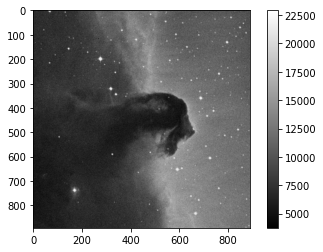

In [13]:
with fits.open('./horse_compress.fits') as hdul:
    image = hdul[1] # When compress is apply, a primary HDU is created. The data is now in the second HDU
    plt.imshow(image.data, cmap='gray')
    plt.colorbar()

### Other compression algorithms

Several commonly used algorithms for compressing image tiles are supported. These include Gzip, Rice, IRAF Pixel List (PLIO), and Hcompress.

## 7.2 -  HDF5

   ### Save as HDF5 and compressed HDF5

In [14]:
image = hdu_list[0]
np_arr = image.data

# Save as HDF5 file
with h5py.File('./horse.hdf5', 'w') as f:
    f.create_dataset("img", data=np_arr, shape=np_arr.shape, fletcher32=True)
    
# Save as compressed HDF5 file
with h5py.File('./horse_compress.hdf5', 'w') as f:
    f.create_dataset("img", data=np_arr, shape=np_arr.shape, fletcher32=True, compression='gzip', compression_opts=9)    

# Retrieves the filse size
non_compress = os.path.getsize('./horse.hdf5')
compress = os.path.getsize('./horse_compress.hdf5')
print(f"Size of the non compressed file : {non_compress}\nSize of compressed file : {compress}")    

Size of the non compressed file : 1609904
Size of compressed file : 964981


### Uncompress the HDF5 file and display it

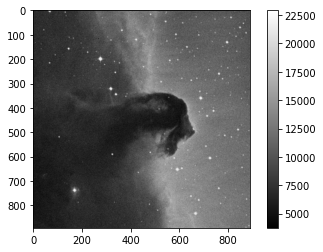

In [15]:
with h5py.File('./horse_compress.hdf5', 'r') as f:
    data = f['img']
    plt.imshow(image.data, cmap='gray')
    plt.colorbar()    

### Lossless compression filters

- **GZIP filter ("gzip")** : Available with every installation of HDF5, so it’s best where portability is required. Good compression, moderate speed. compression_opts sets the compression level and may be an integer from 0 to 9, default is 4.
- **LZF filter ("lzf")** : Available with every installation of h5py (C source code also available). Low to moderate compression, very fast. No options.
- **SZIP filter ("szip")** : Patent-encumbered filter used in the NASA community. Not available with all installations of HDF5 due to legal reasons. Consult the HDF5 docs for filter options.

It is possible to apply custom compression filters by the plugin mechanism and to improve the compression by the options : Scale-Offset filter, Shuffle filter

## 7.3 - Conclusion

| Criteria | FITS | HDF5 | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Compactness | + | ++ | ++ | one '+' for FITS/HDF5/NetCDF4 because it is possible to add compression algorihtm by a plugin system| 

# 8 - Availability tools for processing tools
<a id="availability" />


| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Availability tools for processing tools | + | + | + |  |

# 9 - Content additional embedded
<a id="content" />

## 9.1 - FITS

A FITS file is flat container that holds the following data objects :
- Table
- Image
- Data cube

In [16]:
# create binary Table
counts = np.array([312, 334, 308, 317])
names = np.array(['NGC1', 'NGC2', 'NGC3', 'NGC4'])
values = np.arange(2*2*4).reshape(4, 2, 2)
col1 = fits.Column(name='target', format='10A', array=names)
col2 = fits.Column(name='counts', format='J', unit='DN', array=counts)
col3 = fits.Column(name='notes', format='A10')
col4 = fits.Column(name='spectrum', format='10E')
col5 = fits.Column(name='flag', format='L', array=[True, False, True, True])
col6 = fits.Column(name='intarray', format='4I', dim='(2, 2)', array=values)
coldefs = fits.ColDefs([col1, col2, col3, col4, col5, col6])
hdu_table = fits.BinTableHDU.from_columns(coldefs)

# Create an Image
n = np.arange(100.0)
hdu_image = fits.ImageHDU(n)

# Create the FITS file
new_hdul = fits.HDUList()
new_hdul.append(fits.PrimaryHDU())
new_hdul.append(hdu_image)
new_hdul.append(hdu_table)
new_hdul.writeto('fits_content.fits', overwrite=True)

# open the file
with fits.open('fits_content.fits') as hdul:
    print(hdul.info())

Filename: fits_content.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 ImageHDU         6   (100,)   float64   
  2                1 BinTableHDU     22   4R x 6C   [10A, J, 10A, 10E, L, 4I]   
None


## 9.2 - HDF5 / NetCDF4

An HDF5 file (an object in itself) can be thought of as a container (or group) that holds a variety of heterogeneous data objects (or datasets). The datasets can be images, tables, graphs, and even documents, such as PDF or Excel:

<img src="images/fileobj.png" width="400px">

In [17]:
with h5py.File('./corot_102708694.hdf5', 'w') as file:
    file.attrs.create("corot_id",102708694)

    star_group = file.create_group('star')
    star_preview_group = file.create_group('/star/preview')
    star_coordinates_group = file.create_group('/star/coordinates')
    star_magnitudes_group = file.create_group('/star/magnitudes')
    star_spectral_class_group = file.create_group('/star/spectral_classification')
    star_contamination_l0_group = file.create_group('/star/contamination_l0')
    star_catalogs_references = file.create_group('/star/catalogs_references')

    star_coordinates_group.attrs.create("ra_deg", 100.956126)
    star_coordinates_group.attrs.create("dec_deg", -1.063014)
    star_coordinates_group.attrs.create("dec_deg", -1.063014)
    star_coordinates_group.attrs.create("ra_hms", "06:43:49.470")
    star_coordinates_group.attrs.create("dec_hms", "-01:03:46.850")  

    star_magnitudes_group.attrs.create("B", "12.78")
    star_magnitudes_group.attrs.create("V", "11.72")
    star_magnitudes_group.attrs.create("R", "11.87")
    star_magnitudes_group.attrs.create("J", "10.301±0.024")
    star_magnitudes_group.attrs.create("H", "9.88±0.022")
    star_magnitudes_group.attrs.create("K", "9.806±0.021")

    observations_group = file.create_group('observations')
    spectras_group = file.create_group('spectras')
    planets_group = file.create_group('planets')

    star_spectral_class_group.attrs.create("Spectral type (SED)", "G0")
    star_spectral_class_group.attrs.create("Luminosity class (SED)", "IV")
    star_spectral_class_group.attrs.create("E(B-V) (SED)", 0.15)

    star_catalogs_references.attrs.create("PPMXL", "http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b4975daec&-out.add=.&-source=I/317/sample&PPMXL===2791718448871534422")
    star_catalogs_references.attrs.create("OBS_CAT", "http://cesam.oamp.fr/exodat/quick-access/obscat-info?id=102708694")
    star_catalogs_references.attrs.create("USNO-A2", "http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b49b77187f&-out.add=.&-source=I/252/out&USNO-A2.0===0825-03049717")
    star_catalogs_references.attrs.create("CMC14", "http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b49bd277da&-out.add=.&-source=I/304/out&CMC14===064349.4-010346")
    star_catalogs_references.attrs.create("TYCHO2", "http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b49d742133&-out.add=.&-source=I/259/tyc2&recno=1235387")
    star_catalogs_references.attrs.create("UCAC2_CAT", "http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b49cf22978&-out.add=.&-source=I/289/out&2UCAC=31290682")

    image_filename = "http://cesam.oamp.fr/corot-findingcharts/fieldmap.pl?102708694"
    filename = wget.download(image_filename)
    np_image = cv2.imread(filename)
    dset = star_group.create_dataset('img', data=np_image)

    xmldata = """<xml>
    <something>
        <else>Text</else>
    </something>
    </xml>
    """
    str_type = h5py.special_dtype(vlen=str)
    ds = file.create_dataset('/quality/something.xml', shape=(1,), dtype=str_type)
    ds[:] = xmldata

In [18]:
def print_attrs(name, obj):
    # Create indent
    shift = name.count('/') * '    '
    item_name = name.split("/")[-1]
    print(shift + item_name)
    try:
        for key, val in obj.attrs.items():
            print(shift + '    ' + f"{key}: {val}")
    except:
        pass
        
f = h5py.File('./corot_102708694.hdf5','r')
f.visititems(print_attrs)
f.close()

observations
planets
quality
    something.xml
spectras
star
    catalogs_references
        CMC14: http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b49bd277da&-out.add=.&-source=I/304/out&CMC14===064349.4-010346
        OBS_CAT: http://cesam.oamp.fr/exodat/quick-access/obscat-info?id=102708694
        PPMXL: http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b4975daec&-out.add=.&-source=I/317/sample&PPMXL===2791718448871534422
        TYCHO2: http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b49d742133&-out.add=.&-source=I/259/tyc2&recno=1235387
        UCAC2_CAT: http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b49cf22978&-out.add=.&-source=I/289/out&2UCAC=31290682
        USNO-A2: http://vizier.u-strasbg.fr/viz-bin/VizieR-5?-ref=VIZ50b49b77187f&-out.add=.&-source=I/252/out&USNO-A2.0===0825-03049717
    contamination_l0
    coordinates
        dec_deg: -1.063014
        dec_hms: -01:03:46.850
        ra_deg: 100.956126
        ra_hms: 06:43:49.470
    img
    magnitu

In [19]:
f = h5py.File('./corot_102708694.hdf5', 'r')
print(f['quality']['something.xml'][0])
f.close()

b'<xml>\n    <something>\n        <else>Text</else>\n    </something>\n    </xml>\n    '


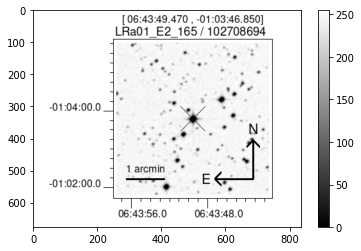

In [20]:
f = h5py.File('./corot_102708694.hdf5', 'r')
image = f['star']['img'][:]
plt.imshow(image.data, cmap='gray')
plt.colorbar() 

## 9.3 - Conclusion

SAS processing will generate files from the pipelines. For each file, a set of files will have to be attached to better define the scientific files:
- pipeline configuration management: inputs, outputs, pipeline configuration parameters, pipeline version
- data quality: currently only a tag is required but it would be surprising if other information were not added such as a preview or more complex information

For all these reasons, the use of HDF5 is an advantage compared to FITS because HDF5 allows to create one and only one file, allowing easier data management and data transfer


| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Content additional embedded | + | +++ | +++ | |

# 10 - Simplicity
<a id="simplicity" />

Both FITS and HDF5/NetCDF have a simple data model. FITS is a bit simple because metadata are visible as ASCII by opening the file by an editor.

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Simplicity | ++ | + | + |  |

# 11 - Stability / evolutivity
<a id="stability"/>

## 11.1 - FITS

There is no standard way to specify the version of a given FITS file. Consider that three keywords have been deprecated (BLOCKED, CROTA2 and EPOCH) by the latest version of FITS. Per the standard, these are “obsolete structures that should not be used in new FITS files but which shall remain valid indefinitely” ! As time passes and changes of this nature accumulate, it will be progressively harder to interpret FITS data correctly

There is no standard way to specify what extensions it supports of a given FITS file. You must read the file and determine dynamically which extensions are present and whether they are understood.

Explicit versioning of FITS files will help but there also needs to be a way to declare that a particular data model is being used and to validate the contents against a namespaced schema.



## 11.2 - HDF5

### 11.2.1 - Version of the library

HDF5 has been evolving for many years now. By default, the library will write objects in the most compatible fashion possible, so that older versions will still be able to read files generated by modern programs. However, there can be feature or performance advantages if you are willing to forgo a certain level of backwards compatibility. By using the “libver” option to File, you can specify the minimum and maximum sophistication of these structures:

In [21]:
f = h5py.File('./horse.hdf5', libver='earliest') # most compatible
f = h5py.File('./horse.hdf5', libver='latest')   # most modern

Here “latest” means that HDF5 will always use the newest version of these structures without particular concern for backwards compatibility. The “earliest” option means that HDF5 will make a best effort to be backwards compatible.

The default is “earliest”.

Specifying version bounds has changed from HDF5 version 1.10.2. There are two new compatibility levels: v108 (for HDF5 1.8) and v110 (for HDF5 1.10). This change enables, for example, something like this:

In [22]:
f = h5py.File('./horse.hdf5', libver=('earliest', 'v108'))

which enforces full backward compatibility up to HDF5 1.8. Using any HDF5 feature that requires a newer format will raise an error.

latest is now an alias to another bound label that represents the latest version. Because of this, the File.libver property will not use latest in its output for HDF5 1.10.2 or later.

### 11.2.2 - Versionning a file

In [23]:
fileobject = h5py.File('mydata.h5', 'w')
versioned_file = VersionedHDF5File(fileobject)
with versioned_file.stage_version('version1') as group:
    group['mydataset'] = np.ones(10000)                                 
v1 = versioned_file['version1']
v1                          

<Committed InMemoryGroup "/_version_data/versions/version1">

In [24]:
v1['mydataset']

<InMemoryArrayDataset "mydataset": shape (10000,), type "<f8">

In [25]:
with versioned_file.stage_version('version2') as group:
    group['mydataset'][0] = -10
v2 = versioned_file['version2']
v2 

<Committed InMemoryGroup "/_version_data/versions/version2">

In [26]:
v1['mydataset'][()]

array([1., 1., 1., ..., 1., 1., 1.])

In [27]:
v2['mydataset'][()]

array([-10.,   1.,   1., ...,   1.,   1.,   1.])

## 11.3 - Conclusion

HDF5 supports multiple versions of the file format specification, which FITS is not capable of. Furthermore, thanks to the structure of HDF5, a file can be managed in version

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Stability / evolutivity | + | +++ | +++ |  |

# 12 - Openness
<a id="openness">

Both FITS and HDF5/NetCDF have a strucure easy to understand

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Openness | + | + | + |  |

# 13 - Expressivity
<a id="expressivity" />

## 13-1 - FITS¶


Flexible Image Transport System (FITS)1 is a standard format for exchanging astronomical data, independent of the hardware platform and software environment.
A file in FITS format consists of a series of Header Data Units (HDUs), each containing two components: an ASCII text header and the binary data. The header contains a series of keywords that describe the data in a particular HDU and the data component may immediately follow the header.
For HST FITS files, the first HDU, or primary header, contains no data. The primary header may be followed by one or more HDUs called extensions. Extensions may take the form of images, binary tables, or ASCII text tables. The data type for each extension is recorded in the XTENSION header keyword

<img src="images/fits_dm.png">

The 80-character card image drives a number of subsequent limitations which result in poor metadata description (8-character keyword, 68-character limit in keyword values, and cumbersome CONTINUE card constructs). This out-dated restriction also results in the awkward implementation of some conventions, such as ESO HIERARCH (Wicenec et al. 2009), that can not overcome the underlying limitations of representation.

Additionally, the lack of namespaces results in uncertainty over metadata meaning with other FITS files. Finally, the 2880 record is a minor but annoying restriction which results in wasteful blocks of whitespace in many FITS files, hampers the use of FITS to capture very small, but richly described data, and impedes the real-time writing of FITS files.

Missing values are a common feature of most datasets, and are distinct from invalid values (such as NaN or Not a Number) that may occur for example in floating point calculations. For images with integer data types, one can make use of the BLANK keyword to represent missing values, and for tables with integer and string columns, one can make use of the TNULL header keyword. However, for floating point images or table columns, there is no mechanism for specifying missing values. This has led to the common use of NaN to represent missing floating point values. However, one should carefully distinguish between true missing values (which in an image could indicate for example an area of sky that was not observed), versus an invalid value (represented by NaN) which may represent for example a saturated pixel; such a distinction is not currently possible in FITS.

The allowed character set in FITS of 7-bit US-ASCII is overly restrictive in an Unicode world (not possible to define scientific or mathematical symbols - very strange for scientific format !).


## 13.2 - HDF5 / NetCDF

The HDF5 Data Model, also known as the HDF5 Abstract (or Logical) Data Model consists of the building blocks for data organization and specification in HDF5.

<img src="images/hdf5_group.png" width="600px">


As below, the different data models for both HDF5 and NetCDF4: 

<table border="0">
    <tr><td><img src="images/hdf5_dm.jpeg"></td><td><img src="images/nc4_dm.png"><td></tr>
    <tr><td><i>HDF5 Data model</i></td><td><i>NetCDF 4 Data model</i></td></tr>
</table>

The mapping of the concepts between HDF5/NetCDF4:

| NetCDF            |   HDF5        |
|-------------------|---------------|
|Dataset            |HDF5 file      |
|Dimensions         |Dataspace      |
|Attribute          |Attribute      |
|Variable           |Dataset        |
|Coordinate Variable|Dimension scale|

HDF5/NetCDF4 handles UTF-8

## 13.3 - Mapping FITS/HDF5

<img src="images/mapping_fits_hdf5.png">
<img src="images/mapping_fits_hdf5_2.png">

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Does the format allow to encode all the information that the producer wishes to express ? | to | to | to | to |

## 13.4 - Conclusion

FITS can support basic data models such as tables and multi-dimensional images but lacks many higher level data models which enable scientific data description. To start with, there is no standardized way of associating the basic models in a related manner. Determining that a particular image extension contains the variance or mask for another image relies on string parsing and shared convention. As data acquisition and data reduction systems have become more complex there has been a move to storing multiple image data components in extensions within a single FITS file. The FITS extension mechanism provides a scheme for having multiple images but, as noted in Greisen (2003), in essentially a flat structure without hierarchy or inheritance. If you have nine images in the file there is no way of indicating that three of them are data, three are an error and three are a quality mask. Indeed, there is no way of specifying which triplets are related. You can use the EXTNAME header to indicate relationships but this relies on convention and string parsing rather than being a standard part of the format.

SAS processing will generate files from the pipelines. For each file, a set of files will have to be attached to better define the scientific files. The possibility to arrange the information in a hierarchical way is an asset because this feature avoids the creation of rules based on the name of the XENSTION FITS

The 8 characters are too restrictive to properly express good semantics. HDF5/NetCDF does not have this constraint

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
|Expressivity | + | +++ | +++ |  |

# 14 - Mastery
<a id="mastery"/>

The scientific community in Planetology seems to know better FITS than HDF5/NetCDF. However FITS and HDF5 have a good documentation and implementation in several languages, that allows to handle any format quickly. However, we have to check if the COTS in pipeline supports HDF5 format (astropy does it)

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Mastery | ++ | + | + | + |

# 15 - Processing
<a id="processing"/>

## 15.1 - Chunks

<table><tr><td><img src="https://support.hdfgroup.org/HDF5/doc/Advanced/Chunking/Images/Fig001.png"></td><td><img src="https://support.hdfgroup.org/HDF5/doc/Advanced/Chunking/Images/Fig002.png"></td></tr><tr><td>Contiguous dataset</td><td>Chunked dataset</td></tr></table>

<table><tr><td><img src="https://support.hdfgroup.org/HDF5/doc/Advanced/Chunking/Images/Fig003.png"></td><td><img src="https://support.hdfgroup.org/HDF5/doc/Advanced/Chunking/Images/Fig004.png"></td></tr><tr><td>Reading part of a row from a contiguous dataset</td><td>Reading part of a column from a contiguous dataset</td></tr></table>

<table><tr><td><img src="https://support.hdfgroup.org/HDF5/doc/Advanced/Chunking/Images/Fig005.png"></td></tr><tr><td>Reading part of a column from a chunked dataset</td></tr></table>

### 15.1.1 - FITS

In [28]:
data = np.ones((10000, 10000), dtype=np.float64)
new_hdul = fits.HDUList()
new_hdul.append(fits.ImageHDU(data=data))
new_hdul.writeto('./mon_fichier.fits', overwrite=True)

new_hdul = fits.open("./mon_fichier.fits", mode='update')
start = time.time()
hdu_data = new_hdul[0].data
hdu_data[:, 2] = 56 * hdu_data[:, 3]
end = time.time()
print("10 000 records have been modified in {} seconde".format(end - start))
new_hdul.close()

new_hdul = fits.open("./mon_fichier.fits")
hdu_data = new_hdul[0].data
print(hdu_data[:, 2])
new_hdul.close()         

10 000 records have been modified in 0.032506465911865234 seconde
[56. 56. 56. ... 56. 56. 56.]


### 15.1.2 - HDF5 without Chunks

In [29]:
if os.path.exists("./mon_fichier.hdf5"):
    os.remove("./mon_fichier.hdf5")
    
# Creating a big matrix
my_array = np.ones((10000, 10000))

# Creating a HDF5
my_file = h5py.File('./mon_fichier.hdf5', 'w')
my_dataset = my_file.create_dataset("fichier de demo2", data=my_array)
my_file.flush()
my_file.close()

# Now, numerical data are easily accessible
start = time.time()
my_file = h5py.File('./mon_fichier.hdf5', 'r+')
my_file["fichier de demo2"][:,2]=56*my_file["fichier de demo2"][:,3]
my_file.flush()
end = time.time()
print("10 000 records have been modified in {} seconde".format(end - start))
my_file.close()

my_file = h5py.File('./mon_fichier.hdf5', 'r')
my_dataset = my_file["fichier de demo2"][:]
print(my_dataset[1:10, 2])
my_file.close()

10 000 records have been modified in 0.23512744903564453 seconde
[56. 56. 56. 56. 56. 56. 56. 56. 56.]


### 15.1.3 - HDF5 with automatic Chunks

The “auto-chunker” tries to keep chunks mostly “square” (in N dimensions) and within certain size limits. It’s also invoked when you specify the use of compression or other filters without explicitly providing a chunk shape.

By the way, the reason the automatically generated chunks are “square” in N dimensions is that the auto-chunker has no idea what you’re planning to do with the dataset, and is hedging its bets. It’s ideal for people who just want to compress a dataset and don’t want to bother with the details, but less ideal for those with specific time-critical access patterns.

In [30]:
if os.path.exists("./mon_fichier.hdf5"):
    os.remove("./mon_fichier.hdf5")
    
# Creating a big matrix
my_array = np.ones((10000, 10000))

# Creating a HDF5
my_file = h5py.File('./mon_fichier.hdf5', 'w')
my_dataset = my_file.create_dataset("fichier de demo2", data=my_array, chunks=True)
print(my_dataset.chunks)
my_file.flush()
my_file.close()

# Now, numerical data are easily accessible
start = time.time()
my_file = h5py.File('./mon_fichier.hdf5', 'r+')
my_file["fichier de demo2"][:,2]=56*my_file["fichier de demo2"][:,3]
my_file.flush()
end = time.time()
print("10 000 records have been modified in {} seconde".format(end - start))
my_file.close()

my_file = h5py.File('./mon_fichier.hdf5', 'r')
my_dataset = my_file["fichier de demo2"][:]
print(my_dataset[1:10, 2])
my_file.close()

(79, 157)
10 000 records have been modified in 0.007293701171875 seconde
[56. 56. 56. 56. 56. 56. 56. 56. 56.]


### 15.1.4 - HDF5 with custom Chunks

In [31]:
if os.path.exists("./mon_fichier.hdf5"):
    os.remove("./mon_fichier.hdf5")
    
# Creating a big matrix
my_array = np.ones((10000, 10000))

# Creating a HDF5
my_file = h5py.File('./mon_fichier.hdf5', 'w')
my_dataset = my_file.create_dataset("fichier de demo2", data=my_array, chunks=(10000,1))
print(my_dataset.chunks)
my_file.flush()
my_file.close()

# Now, numerical data are easily accessible
start = time.time()
my_file = h5py.File('./mon_fichier.hdf5', 'r+')
my_file["fichier de demo2"][:,2]=56*my_file["fichier de demo2"][:,3]
my_file.flush()
end = time.time()
print("10 000 records have been modified in {} seconde".format(end - start))
my_file.close()

my_file = h5py.File('./mon_fichier.hdf5', 'r')
my_dataset = my_file["fichier de demo2"][:]
print(my_dataset[1:10, 2])
my_file.close()

(10000, 1)
10 000 records have been modified in 0.0010159015655517578 seconde
[56. 56. 56. 56. 56. 56. 56. 56. 56.]


## 15.2 - Cache

<img src="https://support.hdfgroup.org/HDF5/doc/Advanced/Chunking/Images/Fig006.png">

h5py_cache : https://github.com/moble/h5py_cache

## 15.3 - Virtual dataset

<img src="https://support.hdfgroup.org/images/tutrvds-ex.png">

Virtual datasets allow a number of real datasets to be mapped together into a single, sliceable dataset via an interface layer. The mapping can be made ahead of time, before the parent files are written, and is transparent to the parent dataset characteristics (SWMR, chunking, compression etc…). The datasets can be meshed in arbitrary combinations, and even the data type converted.

Once a virtual dataset has been created, it can be read just like any other HDF5 dataset.

In [32]:
# create some sample data
data = np.arange(0, 100).reshape(1, 100) + np.arange(1, 5).reshape(4, 1)

# Create source files (0.h5 to 3.h5)
for n in range(4):
    with h5py.File(f"{n}.h5", "w") as f:
        d = f.create_dataset("data", (100,), "i4", data[n])

# Assemble virtual dataset
layout = h5py.VirtualLayout(shape=(4, 100), dtype="i4")
for n in range(4):
    filename = "{}.h5".format(n)
    vsource = h5py.VirtualSource(filename, "data", shape=(100,))
    layout[n] = vsource

# Add virtual dataset to output file
with h5py.File("VDS.h5", "w", libver="latest") as f:
    f.create_virtual_dataset("vdata", layout, fillvalue=-5)
    f.create_dataset("data", data=data, dtype="i4")


# read data back
# virtual dataset is transparent for reader!
with h5py.File("VDS.h5", "r") as f:
    print("Virtual dataset:")
    print(f["vdata"][:, :10])
    print("Normal dataset:")
    print(f["data"][:, :10])

Virtual dataset:
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]
Normal dataset:
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  3  4  5  6  7  8  9 10 11]
 [ 3  4  5  6  7  8  9 10 11 12]
 [ 4  5  6  7  8  9 10 11 12 13]]


## 15.4 - Query capabilities

In [33]:
np.random.seed(1234)
pd.set_option('display.max_rows',20)
index = pd.MultiIndex.from_product([np.arange(10000,11000),pd.date_range('19800101',periods=10000)],names=['id','date'])
df = pd.DataFrame(dict(id2=np.random.randint(0,1000,size=len(index)),w=np.random.randn(len(index))),index=index).reset_index().set_index(['id','date'])
df

id2         w
id    date                     
10000 1980-01-01  815  0.949526
      1980-01-02  723 -0.602331
      1980-01-03  294  0.136814
      1980-01-04   53 -0.667432
      1980-01-05  204 -0.968114
...               ...       ...
10999 2007-05-14  277 -0.117947
      2007-05-15   22  3.062915
      2007-05-16  845  0.629042
      2007-05-17  629  0.253823
      2007-05-18  387 -0.948502

[10000000 rows x 2 columns]

In [34]:
df.to_hdf('test_pandas.h5','df',mode='w',data_columns=['id2'],format='table')

In [35]:
!ls -lhtr test_pandas.h5

-rw-rw-r-- 1 malapert malapert 411M sept. 20 15:57 test_pandas.h5


In [36]:
# Queries
ids=[10101,10898]
start_date='20010101'
end_date='20010301'
pd.read_hdf('test_pandas.h5','df',where='date>start_date & date<end_date')

id2         w
id    date                     
10000 2001-01-02  102 -0.949548
      2001-01-03  854 -1.279592
      2001-01-04  902  1.785103
      2001-01-05  923  0.250497
      2001-01-06  315 -0.082290
...               ...       ...
10999 2001-02-24  447  2.125616
      2001-02-25  340  1.574810
      2001-02-26  312 -1.376166
      2001-02-27  918  0.526532
      2001-02-28  215 -0.459580

[58000 rows x 2 columns]

In [37]:
pd.read_hdf('test_pandas.h5','df',where='date>start_date & date<end_date & id=ids')

id2         w
id    date                     
10101 2001-01-02  773  0.370589
      2001-01-03  557  1.701365
      2001-01-04   79 -0.958125
      2001-01-05  512 -0.190940
      2001-01-06  632  0.929633
...               ...       ...
10898 2001-02-24  122 -0.612245
      2001-02-25  239  0.656354
      2001-02-26  417  0.716874
      2001-02-27  923  2.069831
      2001-02-28  814 -1.031432

[116 rows x 2 columns]

In [38]:
pd.read_hdf('test_pandas.h5','df',where='date>start_date & date<end_date & id=ids & id2>500 & id2<600')

id2         w
id    date                     
10101 2001-01-03  557  1.701365
      2001-01-05  512 -0.190940
      2001-01-13  509  1.163573
      2001-01-27  552 -0.621127
      2001-01-28  587 -0.041261
      2001-01-31  510  0.403102
      2001-02-04  540  1.193892
      2001-02-06  564  0.651627
      2001-02-22  526 -1.639270
      2001-02-24  542  0.644676
      2001-02-25  562  1.017563
      2001-02-28  548 -0.897565
10898 2001-01-05  507 -0.426787
      2001-01-12  586  0.951064
      2001-01-17  512 -0.097563
      2001-01-21  580 -1.355334
      2001-01-26  595  0.387335
      2001-01-31  588 -0.281337
      2001-02-09  511  0.114142

## 15.5 - HPC

https://discourse.pangeo.io/t/best-practices-to-go-from-1000s-of-netcdf-files-to-analyses-on-a-hpc-cluster/588

Demo on GAIA : https://www.youtube.com/watch?v=CQHH5_74O0E&ab_channel=ADASS2020

73 GB cube analyzed in a few seconds!

## 15.6 - Conclusion

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| Processing | + | +++ | +++ |  |

## 16 -  Conclusion
<a id="conlusion"/>

| Criteria | FITS | HDF | NetCDF | Remarks |
| -------- | ---- | --- |------- | ------- |
| User community / Sociability | +++ | + | + |  |
| Documentation | + | ++ | ++ |  |
| Freedom of use | + | + | + |  |
| Independence / autonomy | + | ++ | ++ |  |
| Robustness | + | + | + |  |
| Compactness | + | ++ | ++ | one '+' for FITS/HDF5/NetCDF4 because it is possible to add compression algorihtm by a plugin system|
| Availability tools for processing tools | + | + | + |  |
| Content additional embedded | + | +++ | +++ | |
| Simplicity | ++ | + | + |  |
| Stability / evolutivity | + | +++ | +++ |  |
| Openness | + | + | + |  |
|Expressivity | + | +++ | +++ |  |
| Mastery | ++ | + | + | + |
| Processing | + | +++ | +++ |  |
| Total | 18 | 25 | 25 |  |